In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [4]:
chdir = True

In [5]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [6]:
from IPython.display import IFrame
IFrame("../assets/testbed.png", width=900, height=600)

# load stimulus

In [16]:
current_dir = os.getcwd()
#file_path = os.path.abspath('../linear/datasets/load_stimulus_global.csv')
file_path = os.path.abspath('../Dag/dag-2/datasets/load_stimulus_global.csv')
#file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1662 entries, 0 to 207
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          1662 non-null   float64
 1   output_rate                         1662 non-null   float64
 2   latency                             1662 non-null   float64
 3   flow_tracker_instructions           1662 non-null   float64
 4   nf_router_instructions              1662 non-null   float64
 5   ndpi_stats_instructions             1662 non-null   float64
 6   payload_scan_instructions           1662 non-null   float64
 7   bridge_instructions                 1662 non-null   float64
 8   flow_tracker_branches               1662 non-null   float64
 9   nf_router_branches                  1662 non-null   float64
 10  ndpi_stats_branches                 1662 non-null   float64
 11  payload_scan_branches               1662 non

# DNN to predict rate (training set: global)

In [24]:
current_dir = os.getcwd()

#file_path = os.path.abspath('../linear/datasets/load_stimulus_global.csv')
file_path = os.path.abspath('../Dag/dag-2/datasets/load_stimulus_global.csv')
#file_path = os.path.abspath('../Dag/dag-1/datasets/load_stimulus_global.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()

In [25]:
# data set
# load_stimulus_global.csv: exp1_exp10
# load_stimulus_global_1.csv:exp1_exp10+fixed_5000+fixed_7500
# load_stimulus_global_2.csv:exp1_exp10+fixed_5000+fixed_7500+random
# load_stimulus_global_3.csv:exp1_exp10+random
#load_stimulus_global_4.csv:exp1_exp10+stage_random
# performance: global>3>2>1

In [26]:
# training 
X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
X = df.drop(['input_rate','output_rate', 'latency','payload_scan_cycles','ndpi_stats_branch-load-misses',
             'nf_router_cycles','bridge_cycles','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses'], axis=1)

y = df['latency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

1662


In [27]:
# model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(1))

In [28]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=8, epochs=100, verbose=1)

Epoch 1/100
146/146 [==============================] - 1s 3ms/step - loss: 8020.8394
Epoch 2/100
146/146 [==============================] - 0s 3ms/step - loss: 7768.3896
Epoch 3/100
146/146 [==============================] - 0s 3ms/step - loss: 7662.5557
Epoch 4/100
146/146 [==============================] - 0s 3ms/step - loss: 7570.0586
Epoch 5/100
146/146 [==============================] - 1s 4ms/step - loss: 7714.0146
Epoch 6/100
146/146 [==============================] - 0s 3ms/step - loss: 7523.1958
Epoch 7/100
146/146 [==============================] - 0s 3ms/step - loss: 7567.5312
Epoch 8/100
146/146 [==============================] - 0s 3ms/step - loss: 7557.8115
Epoch 9/100
146/146 [==============================] - 1s 4ms/step - loss: 7433.6836
Epoch 10/100
146/146 [==============================] - 0s 3ms/step - loss: 7305.7979
Epoch 11/100
146/146 [==============================] - 0s 3ms/step - loss: 7445.1245
Epoch 12/100
146/146 [==============================] - 0s 3ms/

146/146 [==============================] - 0s 3ms/step - loss: 5407.7168
Epoch 97/100
146/146 [==============================] - 0s 3ms/step - loss: 5585.2178
Epoch 98/100
146/146 [==============================] - 0s 3ms/step - loss: 5889.2256
Epoch 99/100
146/146 [==============================] - 0s 3ms/step - loss: 5620.0889
Epoch 100/100
146/146 [==============================] - 0s 3ms/step - loss: 5369.6738


16/16 [==============================] - 0s 3ms/step
R-squared: -0.13954764712661327
[0.0, 9.619238476953909, 21.8436873747495, 31.863727454909817, 41.48296593186373, 49.09819639278557, 55.11022044088176, 60.72144288577155, 64.92985971943888, 69.13827655310621, 72.94589178356713]


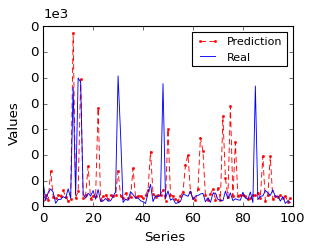

In [29]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:100], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:100], c='b',linestyle='-',linewidth = 0.8,label='Real')


plt.legend(loc="upper right", fontsize=10)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')



plt.show()

In [23]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.3071133224928637


# resource stimulus

In [101]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets/resource_stimulus_global_A-B-C.csv')

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()

In [102]:
# training 
X = df.drop(['input_rate', 'latency', 'nf_router_LLC-load-misses','nf_router_cache-misses',\
             'firewall_LLC-load-misses','ndpi_stats_cache-misses','ndpi_stats_LLC-load-misses','bridge_cache-misses',\
             'bridge_instructions','bridge_branches','firewall_instructions' ], axis=1)
#X=df.drop(['input_rate', 'latency'], axis=1)
y = df['latency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

2239


In [103]:
# model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(32, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))

# Add output layer, force prediction larger than zero
model.add(Dense(1,activation = 'softplus'))

In [104]:
import keras
from keras.callbacks import LearningRateScheduler
# learning rate regular
def lr_schedule(epoch):
    if epoch < 10:
        return 0.01
    elif epoch < 20:
        return 0.001
    else:
        return 0.0001
lr_scheduler = LearningRateScheduler(lr_schedule)

In [105]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

#model.fit(X_train, y_train, epochs=30, batch_size=32, callbacks=[lr_scheduler])

model.fit(X_train, y_train, batch_size=8, epochs=100, verbose=1)

Epoch 1/100
196/196 [==============================] - 1s 3ms/step - loss: 53259108.0000
Epoch 2/100
196/196 [==============================] - 1s 3ms/step - loss: 40088824.0000
Epoch 3/100
196/196 [==============================] - 1s 3ms/step - loss: 27875826.0000
Epoch 4/100
196/196 [==============================] - 1s 3ms/step - loss: 23728784.0000
Epoch 5/100
196/196 [==============================] - 1s 3ms/step - loss: 22879420.0000
Epoch 6/100
196/196 [==============================] - 1s 3ms/step - loss: 22790568.0000
Epoch 7/100
196/196 [==============================] - 1s 4ms/step - loss: 22654294.0000
Epoch 8/100
196/196 [==============================] - 1s 4ms/step - loss: 22605712.0000
Epoch 9/100
196/196 [==============================] - 1s 3ms/step - loss: 22456298.0000
Epoch 10/100
196/196 [==============================] - 1s 3ms/step - loss: 22434212.0000
Epoch 11/100
196/196 [==============================] - 1s 3ms/step - loss: 22508100.0000
Epoch 12/100
196/19

196/196 [==============================] - 1s 3ms/step - loss: 20757176.0000
Epoch 93/100
196/196 [==============================] - 1s 3ms/step - loss: 20598804.0000
Epoch 94/100
196/196 [==============================] - 1s 3ms/step - loss: 20537514.0000
Epoch 95/100
196/196 [==============================] - 1s 3ms/step - loss: 20494178.0000
Epoch 96/100
196/196 [==============================] - 1s 3ms/step - loss: 20525628.0000
Epoch 97/100
196/196 [==============================] - 1s 3ms/step - loss: 20517262.0000
Epoch 98/100
196/196 [==============================] - 1s 3ms/step - loss: 20560614.0000
Epoch 99/100
196/196 [==============================] - 1s 4ms/step - loss: 20528980.0000
Epoch 100/100
196/196 [==============================] - 1s 5ms/step - loss: 20595282.0000


2/2 [==============================] - 0s 2ms/step


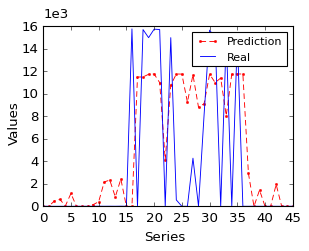

[1.5204000e+01 8.9000000e+00 7.6930000e+00 9.5390000e+00 9.2830000e+00
 7.4620000e+00 1.1226000e+01 8.4360000e+00 1.0128000e+01 9.7020000e+00
 1.9053000e+01 1.1248000e+01 1.5255000e+01 1.1597000e+01 1.9289000e+01
 1.1348000e+01 1.5777523e+04 8.2050000e+00 1.5716774e+04 1.5000000e+04
 1.5754143e+04 1.5719004e+04 8.4190000e+00 1.5000000e+04 5.7331600e+02
 8.3200000e+00 1.0672000e+01 4.2846300e+03 1.6503000e+01 8.0881820e+03
 1.5668607e+04 1.5000000e+04 1.2096000e+01 1.5000000e+04 1.1360000e+01
 1.5000000e+04 9.6380000e+00 9.3830000e+00 1.2912000e+01 9.9870000e+00
 8.8320000e+00 1.1616000e+01 9.1680000e+00 8.6750000e+00 8.3230000e+00
 1.4422000e+01]


In [115]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
accuracy_cdf=[]

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:100], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:100], c='b',linestyle='-',linewidth = 0.8,label='Real')


plt.legend(loc="upper right", fontsize=10)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
folder_path = 'figure/latency_prediction'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'accuracy-linear-testset-resource.pdf' )
plt.savefig(file_path)

plt.show()
print(y_test)

In [116]:
#y_test[y_test == 15000000] = 12000000
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.18806936067408075


2/2 [==============================] - 0s 5ms/step
accurancy with thoreshold 5%:[0.]
[array([0.]), array([0.]), array([2.17391304]), array([17.39130435]), array([19.56521739]), array([21.73913043]), array([21.73913043]), array([21.73913043]), array([21.73913043]), array([21.73913043]), array([50.])]


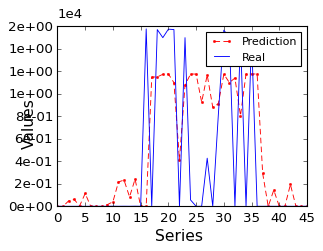

In [117]:
# predict dataset 'linear'

# read the CSV file
path = '../linear/datasets/resource_stimulus_exp-4-1-5.csv'

df = pd.read_csv(path)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# separate the features and target variable


# Now you can access the 'columns' attribute
#X_test = df.drop(['Unnamed: 0','input_rate','latency'], axis=1)
X_test = df.drop(['Unnamed: 0','input_rate','latency', 'nf_router_LLC-load-misses','nf_router_cache-misses',\
             'firewall_LLC-load-misses','ndpi_stats_cache-misses','ndpi_stats_LLC-load-misses','bridge_cache-misses',\
             'bridge_instructions','bridge_branches','firewall_instructions' ], axis=1)
y_test =df['latency'].values

# standardize the features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# evaluate
y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
mse = mean_squared_error(y_test, y_pred)

# accuracy
threshold = 0.05
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print(f'accurancy with thoreshold 5%:{accuracy_within_threshold}')

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred, marker='o', c='r',markersize = 2,linewidth = 0.8,  markeredgecolor='red', linestyle='-', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist(), c='b',linestyle='-',linewidth = 0.8, label='Real')

plt.legend(loc="upper right", fontsize=10)
fig.text(0.5, 0.01, 'Series', size='14', ha='center')
fig.text(0.01, 0.5, 'Values', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set x-axis and y-axis limits
plt.xlim(0, 45)


# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{x/10000:.0e}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e4', size='12', ha='left', va='top')



#save figure
folder_path = 'figure/latency_prediction'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'accuracy-latency-linear-resource.pdf' )
plt.savefig(file_path)
plt.show()

In [118]:
# Metadata for specific SFC configurations
exp_rs = "exp-4-1-3"
vnfs = ["firewall.csv", "nf_router.csv", "ndpi_stats.csv", "payload_scan.csv", "bridge.csv"]

In [119]:
# Some helper functions
def get_stat(stat_name, source="general/fastclick-varied-cbr-rates.csv", index=1):
    stat = []
    with open(source) as file:
        for line in file:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[index])
    
    return list(map(lambda x:float(x), stat[:-1]))

def plot_stat(stat_name, ax, source, index=1):
    stat = get_stat(stat_name, source, index)
    ax.plot(stat)
    ax.grid(True)
    ax.set_title(stat_name)

def plot_stats(stat_names, source="fastclick-varied-cbr-rates.csv", index=1):
    i = 1
    fig, ax = plt.subplots(len(stat_names),2)
    for s in stat_names:
        ax = plt.subplot(len(stat_names),1, i)
        plot_stat(s, ax, source, index)
        i+=1
    fig.tight_layout()
    

In [120]:
def parse_seq(exp_type, exp_num, file, index=5):
    "Parse sequential data, specialized for the TX/RX/Latency experiments"
    tmp = []
    
    if file.startswith("latency.csv"):
        with open(os.path.join("..\\linear\\data_modify_latency", exp_type, exp_num, file)) as f:
            lines = f.readlines()[4:] if exp_type == "load_stimulus" else f.readlines()
            for i in range(len(lines)):
                if i % 2 != 0:  # Check if the index is odd
                    value = float(lines[i].strip()) / 1000
                    tmp.append(value)
    else:
        with open(os.path.join("..\\linear\\data_modify_latency", exp_type, exp_num, file)) as f:
            next(f)
            for l in f:
                try:
                    value = float(l.strip().split(",")[index])
                except ValueError:
                    value = "N/A"
                tmp.append(value)
                
    return tmp

In [121]:
def parse_reg(exp_type, exp_num, file, stat_name, index=1):
    "Parse the Perf data"
    stat = []
    with open(os.path.join("..\\linear\\data_modify_latency", exp_type, exp_num, file)) as f:
        for line in f:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[index])
    
    return list(map(lambda x:float(x), stat[:-1]))

46
46


C:\Users\Qiong\AppData\Local\Temp\ipykernel_28336\2600858362.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(left_y_vals)
C:\Users\Qiong\AppData\Local\Temp\ipykernel_28336\2600858362.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(right_y_vals)


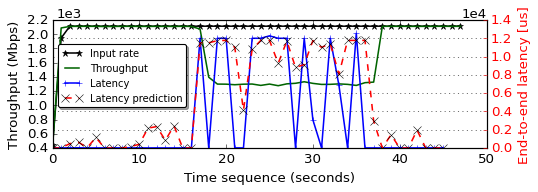

In [123]:

fig, ax = plt.subplots(facecolor='white', figsize=(7,2))
plt.style.use('classic')
#ax.grid(True)

line_width = 1.4


ax.set_xlabel("Time sequence (seconds)")
ax.set_ylabel("Throughput (Mbps)")

ax2 = ax.twinx()
ax2.tick_params(axis='y', colors='red')
ax2.set_ylabel("End-to-end latency [us]", color="red")

l = ax.plot(parse_seq("resource_stimulus", exp_rs, "tx_stats.csv"), marker=next(marker), color='black', label="Input rate",linewidth=line_width,)
l1 = ax.plot(parse_seq("resource_stimulus", exp_rs, "rx_stats.csv"), color='darkgreen', label="Throughput",linewidth=line_width,)
lat = parse_seq("resource_stimulus", exp_rs, "latency.csv")

print(len(lat))
print(len(y_pred))
l2 = ax2.plot(np.arange(0, len(lat)), lat, color="blue", label="Latency", marker='+',linewidth=line_width,)
l3 = ax2.plot(np.arange(0, len(lat)), y_pred, color="red", label="Latency prediction", marker=next(marker), linestyle="dashed", markersize=8, markerfacecolor='red', markeredgecolor='black', linewidth=line_width)

lns = l + l1 + l2 + l3
labs = [l.get_label() for l in lns]


# Divide left y-axis values by 1000
left_y_vals = ax.get_yticks() / 1000
ax.set_yticklabels(left_y_vals)

# Divide right y-axis values by 10000
right_y_vals = ax2.get_yticks() / 10000
ax2.set_yticklabels(right_y_vals)
plt.grid()
# Add labels in the top corners
ax.text(0.01, 1.1, "1e3", transform=ax.transAxes, ha="left", va="top")
ax2.text(1, 1.1, "1e4", transform=ax2.transAxes, ha="right", va="top")
plt.legend(lns, labs, loc='upper center',fontsize=9, bbox_to_anchor=(0.16,0.85), fancybox=True, shadow=True)
plt.savefig('resource_latency_prediction_new.pdf', bbox_inches='tight')



In [114]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.18806936067408075


46
46


C:\Users\Qiong\AppData\Local\Temp\ipykernel_28336\2663845219.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(left_y_vals)
C:\Users\Qiong\AppData\Local\Temp\ipykernel_28336\2663845219.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(right_y_vals)


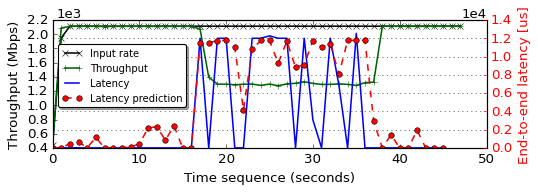

In [162]:

fig, ax = plt.subplots(facecolor='white', figsize=(7,2))
plt.style.use('classic')
#ax.grid(True)

line_width = 1.4


ax.set_xlabel("Time sequence (seconds)")
ax.set_ylabel("Throughput (Mbps)")

ax2 = ax.twinx()
ax2.tick_params(axis='y', colors='red')
ax2.set_ylabel("End-to-end latency [us]", color="red")

l = ax.plot(parse_seq("resource_stimulus", exp_rs, "tx_stats.csv"), color='black', label="Input rate", linewidth=line_width, marker='x', markerfacecolor='black', markeredgecolor='black')
l1 = ax.plot(parse_seq("resource_stimulus", exp_rs, "rx_stats.csv"), color='darkgreen', marker='+', label="Throughput", linewidth=line_width, markerfacecolor='darkgreen', markeredgecolor='darkgreen')
lat = parse_seq("resource_stimulus", exp_rs, "latency.csv")

print(len(lat))
print(len(y_pred))
l2 = ax2.plot(np.arange(0, len(lat)), lat, color="blue", label="Latency",linewidth=line_width,)
l3 = ax2.plot(np.arange(0, len(lat)), y_pred, color="red", label="Latency prediction", marker=next(marker), linestyle="dashed", markersize=10, markerfacecolor='red', markeredgecolor='black', linewidth=line_width)

lns = l + l1 + l2 + l3
labs = [l.get_label() for l in lns]


# Divide left y-axis values by 1000
left_y_vals = ax.get_yticks() / 1000
ax.set_yticklabels(left_y_vals)

# Divide right y-axis values by 10000
right_y_vals = ax2.get_yticks() / 10000
ax2.set_yticklabels(right_y_vals)
plt.grid()
# Add labels in the top corners
ax.text(0.01, 1.1, "1e3", transform=ax.transAxes, ha="left", va="top")
ax2.text(1, 1.1, "1e4", transform=ax2.transAxes, ha="right", va="top")
plt.legend(lns, labs, loc='upper center',fontsize=9, bbox_to_anchor=(0.16,0.85), fancybox=True, shadow=True)
plt.savefig('resource_latency_prediction_new.pdf', bbox_inches='tight')

